In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

/Users/mustafamuratarat/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x_data = np.linspace(0.0,10.0,1000000)

In [3]:
noise = np.random.rand(len(x_data))

In [4]:
noise

array([0.3810751 , 0.0554012 , 0.68304982, ..., 0.90341917, 0.21085005,
       0.83434516])

In [5]:
noise.shape

(1000000,)

In [6]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [7]:
x_data.shape

(1000000,)

y = mx + b

b=5

In [8]:
y_true = (0.5 * x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data = x_data, columns = ['X Data'])
y_df = pd.DataFrame(data = y_true, columns = ['Y'])

In [10]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [11]:
y_df.head()

,Y
0,5.381075
1,5.055406
2,5.683060
3,5.839963
4,5.647664


In [12]:
my_data = pd.concat([x_df, y_df], axis = 1)

In [13]:
my_data.head()

,X Data,Y
0,0.00000,5.381075
1,0.00001,5.055406
2,0.00002,5.683060
3,0.00003,5.839963
4,0.00004,5.647664


In [14]:
#sampling from data frame, n = 250
my_data.sample(n=250)

,X Data,Y
189976,1.899762,6.319512
742197,7.421977,9.443722
852654,8.526549,9.407251
973492,9.734930,10.221308
864931,8.649319,9.874788
592512,5.925126,8.088142
524929,5.249295,8.207710
649984,6.499846,9.193334
560561,5.605616,8.393651
950083,9.500840,10.465632


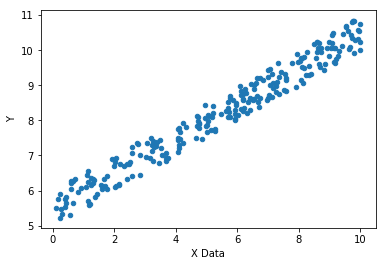

In [15]:
my_data.sample(n=250).plot(kind = 'scatter', x= 'X Data', y = 'Y')

In [16]:
batch_size = 8

In [17]:
np.random.rand(2)

array([0.2529174 , 0.46491521])

In [18]:
m = tf.Variable(0.2529174)
b = tf.Variable(0.46491521)

In [19]:
xph = tf.placeholder(tf.float32,shape=[batch_size])

In [20]:
yph = tf.placeholder(tf.float32,shape=[batch_size])

In [22]:
y_model = m*xph + b  #this is essentially a graph

In [24]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [27]:
init = tf.global_variables_initializer()

In [45]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size)
        feed = {xph: x_data[rand_ind], yph: y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [46]:
model_m

0.5015378

In [47]:
model_b

5.50392

In [48]:
#y = mx + b
y_hat = model_m*x_data + model_b

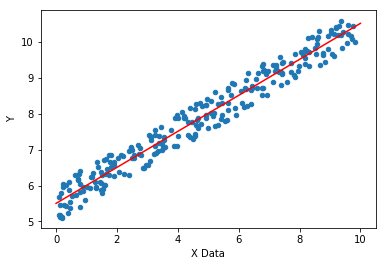

In [49]:
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data,y_hat,'-r')

# Solve the same problem with TF API tf.estimator

In [50]:
feat_cols = [tf.feature_column.numeric_column('x', shape =[1])]

In [53]:
estimator = tf.estimator.LinearRegressor(feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpq7h6o3_o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1826373f60>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [69]:
y_true #the same y column we created above

array([ 5.3810751 ,  5.0554062 ,  5.68305982, ..., 10.90340917,
       10.21084505, 10.83434516])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data, y_true, test_size=0.3, random_state =101)

In [59]:
print(x_train.shape)

(700000,)


In [61]:
x_eval.shape

(300000,)

In [62]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size = 8, num_epochs=None,shuffle=True)

In [63]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size = 8, num_epochs=1000,shuffle=False)

In [64]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval}, y_eval, batch_size = 8, num_epochs=1000,shuffle=False)

In [71]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpq7h6o3_o/model.ckpt.
INFO:tensorflow:loss = 501.51968, step = 1
INFO:tensorflow:global_step/sec: 1069.14
INFO:tensorflow:loss = 10.820819, step = 101 (0.095 sec)
INFO:tensorflow:global_step/sec: 1327.79
INFO:tensorflow:loss = 22.235668, step = 201 (0.076 sec)
INFO:tensorflow:global_step/sec: 1282.03
INFO:tensorflow:loss = 17.878117, step = 301 (0.078 sec)
INFO:tensorflow:global_step/sec: 1306.2
INFO:tensorflow:loss = 5.432604, step = 401 (0.077 sec)
INFO:tensorflow:global_step/sec: 1396.51
INFO:tensorflow:loss = 4.151667, step = 501 (0.071 sec)
INFO:tensorflow:global_step/sec: 1392.45
INFO:tensorflow:loss = 2.8142018, step = 601 (0.072 sec)
INFO:tensorflow:global_step/sec: 1386.29
INFO:tensorflow:loss = 2.9249115, step = 701 (0.073 sec)
INFO:tensorflow:global_step/sec: 1330.87
INFO:tensorflow:loss = 4.0253506, step = 801 (0.074 sec)
INFO:tensorfl

In [74]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Starting evaluation at 2018-04-09-19:32:54
INFO:tensorflow:Restoring parameters from /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpq7h6o3_o/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-09-19:32:55
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.21065943, global_step = 1000, loss = 1.6852754


In [75]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-04-09-19:33:59
INFO:tensorflow:Restoring parameters from /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpq7h6o3_o/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-04-09-19:34:00
INFO:tensorflow:Saving dict for global step 1000: average_loss = 0.21436286, global_step = 1000, loss = 1.7149029


In [76]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 0.21065943, 'loss': 1.6852754, 'global_step': 1000}


In [77]:
print('EVALUATION DATA METRICS')
print(eval_metrics)

EVALUATION DATA METRICS
{'average_loss': 0.21436286, 'loss': 1.7149029, 'global_step': 1000}


In [78]:
#New data
brand_new_data = np.linspace(0,10,10)

In [80]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle = False)

In [82]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpq7h6o3_o/model.ckpt-1000


[{'predictions': array([4.788874], dtype=float32)},
 {'predictions': array([5.4677477], dtype=float32)},
 {'predictions': array([6.146621], dtype=float32)},
 {'predictions': array([6.825495], dtype=float32)},
 {'predictions': array([7.504368], dtype=float32)},
 {'predictions': array([8.183241], dtype=float32)},
 {'predictions': array([8.862115], dtype=float32)},
 {'predictions': array([9.540989], dtype=float32)},
 {'predictions': array([10.219862], dtype=float32)},
 {'predictions': array([10.898735], dtype=float32)}]

In [108]:
#Extracting the predictions 1
preds = list(estimator.predict(input_fn=input_fn_predict))
predictions = [pred["predictions"] for pred in preds]
predictions

INFO:tensorflow:Restoring parameters from /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpq7h6o3_o/model.ckpt-1000


[array([4.788874], dtype=float32),
 array([5.4677477], dtype=float32),
 array([6.146621], dtype=float32),
 array([6.825495], dtype=float32),
 array([7.504368], dtype=float32),
 array([8.183241], dtype=float32),
 array([8.862115], dtype=float32),
 array([9.540989], dtype=float32),
 array([10.219862], dtype=float32),
 array([10.898735], dtype=float32)]

In [83]:
#OR
predictions =[]
#each of the items is a dictionary
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from /var/folders/t9/wrvs828j3qx2tvhc10_c8b400000gn/T/tmpq7h6o3_o/model.ckpt-1000


In [84]:
predictions

[array([4.788874], dtype=float32),
 array([5.4677477], dtype=float32),
 array([6.146621], dtype=float32),
 array([6.825495], dtype=float32),
 array([7.504368], dtype=float32),
 array([8.183241], dtype=float32),
 array([8.862115], dtype=float32),
 array([9.540989], dtype=float32),
 array([10.219862], dtype=float32),
 array([10.898735], dtype=float32)]

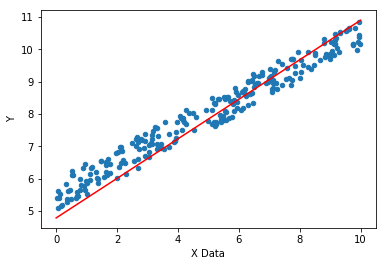

In [86]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r')